(50000, 28, 28) (50000,)


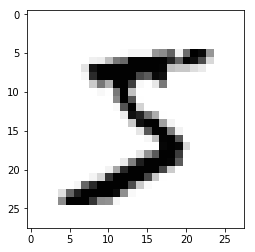

In [100]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [101]:
X_train = X_train.reshape([50000, 784])
X_test = X_test.reshape([10000, 784])
X_val = X_val.reshape([-1, 784])
y_train = np.eye(10)[y_train]
y_val = np.eye(10)[y_val]
y_test = np.eye(10)[y_test]

In [115]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

In [129]:
learning_rate = 1e-3
hidden_size = [50,30]
input_size = 784
output_size = 10
epoch = 50
batch_size = 600

sizes = [input_size, output_size]

In [130]:
# weights and bias
weight_0 = tf.Variable(1e-2 * np.random.rand(input_size, hidden_size[0]), dtype = 'float64')
weight_1 = tf.Variable(1e-2 * np.random.rand(hidden_size[0], hidden_size[1]), dtype = 'float64')
weight_2 = tf.Variable(1e-2 * np.random.rand(hidden_size[1], output_size), dtype = 'float64')
weights = [weight_0, weight_1, weight_2]

bias_0 = tf.Variable(np.zeros(hidden_size[0]), dtype = 'float64')
bias_1 = tf.Variable(np.zeros(hidden_size[1]), dtype = 'float64')
bias_2 = tf.Variable(np.zeros(output_size), dtype = 'float64')
bias = [bias_0, bias_1, bias_2]

In [131]:
# input
input_X = tf.placeholder(shape = (None, 784), dtype = 'float64', name = 'input_X')
input_y = tf.placeholder(shape = (None, 10), dtype = 'int32', name = 'input_y')

In [132]:
# compute loss
layer_0 = tf.nn.relu(tf.matmul(input_X, weights[0]) + bias[0])
layer_1 = tf.nn.relu(tf.matmul(layer_0, weights[1]) + bias[1])
layer_out = tf.matmul(layer_1, weights[2]) + bias[2]
logits = tf.nn.softmax(layer_out)

cross_entropy = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = input_y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)
predict = tf.argmax(logits, 1)
correct_prediction = tf.equal(predict, tf.argmax(input_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
init = tf.global_variables_initializer()

In [133]:
num_train = X_train.shape[0]
num_batch = num_train // batch_size
validation_size = X_val.shape[0] // num_batch

with tf.Session() as sess:
    sess.run(init)
    train_acc_hist = []
    val_acc_hist = []
    for e in range(epoch):
        for i in range(num_batch):
            X_batch = X_train[i * batch_size:(i+1)*batch_size]
            y_batch = y_train[i * batch_size:(i+1)*batch_size]
            sess.run(optimizer, feed_dict = {input_X: X_batch, input_y:y_batch})
        
        train_accuracy = accuracy.eval({input_X: X_batch, input_y: y_batch})
        val_accuracy = accuracy.eval({input_X: X_val, input_y: y_val})
        train_acc_hist.append(train_accuracy)
        val_acc_hist.append(val_accuracy)
        print('epoch {}, training accuracy: {}, val accuracy: {}'.format(e + 1, train_accuracy, val_accuracy))
        
    test_accuracy = accuracy.eval({input_X: X_test, input_y: y_test})
    print('\ntraining finished\ntest accuracy: ', test_accuracy)

epoch 1, training accuracy: 0.2199999988079071, val accuracy: 0.2061000019311905
epoch 2, training accuracy: 0.2866666615009308, val accuracy: 0.28619998693466187
epoch 3, training accuracy: 0.3583333194255829, val accuracy: 0.3490999937057495
epoch 4, training accuracy: 0.5483333468437195, val accuracy: 0.5343999862670898
epoch 5, training accuracy: 0.6050000190734863, val accuracy: 0.613099992275238
epoch 6, training accuracy: 0.6700000166893005, val accuracy: 0.6919000148773193
epoch 7, training accuracy: 0.7316666841506958, val accuracy: 0.7272999882698059
epoch 8, training accuracy: 0.7583333253860474, val accuracy: 0.7727000117301941
epoch 9, training accuracy: 0.8550000190734863, val accuracy: 0.8596000075340271
epoch 10, training accuracy: 0.903333306312561, val accuracy: 0.9172000288963318
epoch 11, training accuracy: 0.9166666865348816, val accuracy: 0.9248999953269958
epoch 12, training accuracy: 0.92166668176651, val accuracy: 0.9294999837875366
epoch 13, training accuracy:

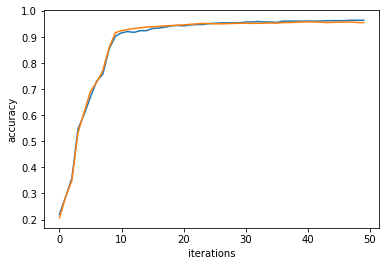

In [135]:
iterations = list(range(50))
plt.plot(iterations, train_acc_hist, label='Train')
plt.plot(iterations, val_acc_hist, label='Val')
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.show()